In [ ]:
# learning_rate (eta):

# 설명: 각 트리의 기여 정도를 줄이는 역할을 합니다. 낮은 값은 학습을 더 천천히 진행하게 하지만, 더 나은 일반화 성능을 가져올 수 있습니다.
# 값 범위: 0.01 ~ 0.3
# 영향: 너무 높으면 모델이 과적합될 수 있고, 너무 낮으면 학습 속도가 느려집니다.
# max_depth:

# 설명: 개별 트리의 최대 깊이를 설정합니다. 깊이가 깊을수록 모델이 복잡해집니다.
# 값 범위: 3 ~ 10
# 영향: 너무 깊으면 과적합 위험이 있고, 너무 얕으면 모델이 충분히 학습하지 못할 수 있습니다.
# n_estimators:

# 설명: 학습에 사용할 트리의 개수를 설정합니다.
# 값 범위: 100 ~ 1000 (또는 더 높음)
# 영향: 트리 개수가 많으면 모델이 더 잘 학습하지만, 계산 비용이 증가합니다.
# subsample:

# 설명: 각 트리를 학습할 때 사용할 데이터의 비율을 설정합니다.
# 값 범위: 0.5 ~ 1.0
# 영향: 낮은 값은 과적합을 방지하는 데 도움이 될 수 있습니다.
# colsample_bytree:

# 설명: 각 트리를 학습할 때 사용할 피처의 비율을 설정합니다.
# 값 범위: 0.3 ~ 1.0
# 영향: 낮은 값은 과적합을 방지하고, 계산 비용을 줄일 수 있습니다.
# gamma:

# 설명: 트리가 분할을 하기 위해 필요한 최소 손실 감소를 설정합니다.
# 값 범위: 0 ~ 5 (또는 그 이상)
# 영향: 높은 값은 모델을 더 보수적으로 만들어 과적합을 방지할 수 있습니다.
# lambda (reg_lambda):

# 설명: L2 정규화 항의 가중치를 설정합니다.
# 값 범위: 0 ~ 10
# 영향: 정규화는 모델의 복잡성을 줄이고 과적합을 방지합니다.
# alpha (reg_alpha):

# 설명: L1 정규화 항의 가중치를 설정합니다.
# 값 범위: 0 ~ 10
# 영향: 정규화는 모델의 복잡성을 줄이고 과적합을 방지합니다.

In [2]:
# 사용할 라이브러리 임포트
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor  


In [10]:
# 데이터 로드

df = pd.read_csv('C:/Users/NT551/Desktop/데이터 추출(연습)/high_diamond_ranked_10min.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [36]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

In [37]:
print(df.describe())

          blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
count  9879.000000      9879.000000         9879.000000     9879.000000   
mean      0.499038        22.288288            2.824881        0.504808   
std       0.500024        18.019177            2.174998        0.500002   
min       0.000000         5.000000            0.000000        0.000000   
25%       0.000000        14.000000            1.000000        0.000000   
50%       0.000000        16.000000            3.000000        1.000000   
75%       1.000000        20.000000            4.000000        1.000000   
max       1.000000       250.000000           27.000000        1.000000   

         blueKills   blueDeaths  blueAssists  blueEliteMonsters  blueDragons  \
count  9879.000000  9879.000000  9879.000000        9879.000000  9879.000000   
mean      6.183925     6.137666     6.645106           0.549954     0.361980   
std       3.011028     2.933818     4.064520           0.625527     0.480597   
min 

In [38]:
print(df.isnull().sum())

blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds                      0
redTowersDestr

In [41]:
y = df["blueWins"]

X = df.drop(columns=["blueWins"])

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [44]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [45]:
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')



In [46]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [47]:
y_pred = model.predict(X_test)

In [48]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.6964


In [49]:
from sklearn.model_selection import GridSearchCV

parpa_grid = {
    'max_depth': [3,5,7],   # 트리의 최대 깊이 설정 / 너무 깊으면 과적합, 너무 얕으면 모델이 충분히 학습 X ( 3 ~ 10 )
    'learning_rate':[0.01,0.1,0.2],  # 너무 높으면 과적합 가능, 너무 낮으면 학습 속도가 느려짐 (0.01 ~ 0.3)
    'n_estimators':[100,200,300] # 트리의 개수 설정 / 개수가 많으면 모델이 더 잘 ㅎ가습하지만, 계산 비용 증가
    # 'subsample'=0.8, # 데이터의 비율 설정 / 낮은 값은 과적합 방지 도움 ( 0.5 ~ 1.0 )
    # 'colsample_bytree'=0.8, # 피처의 비율 설정 / 낮은 값은 과적합 방지, 계산 비용 절감 ( 0.3 ~ 1.0)
    # 'gamma'=0, # 최소 손실 감소 설정 / 높은 값은 모델을 더 보수적으로 만들어 과적합 방지 ( 0 ~ 5 ( 그 이상))
    # 'reg_lambda'=1,  # L2 정규화 항의 가중치 설정 / 모델의 복잡성을 줄이고 과적합을 방지 ( 0 ~ 10 )
    # 'reg_alpha'=0 # L1 정규화 항의 가중치 설정 / 복잡성을 줄이고 과적합을 방지 ( 0 ~ 10 )
}

In [50]:
grid_search = GridSearchCV(estimator=model, param_grid=parpa_grid, cv=3, scoring='accuracy', verbose=2)

In [51]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_es

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [52]:
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


In [56]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

In [57]:
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Best model accuracy: {accuracy_best:.4f}')

Best model accuracy: 0.7257


In [58]:
import joblib

# 모델 저장
joblib.dump(best_model, 'xgboost_model.pkl')

# 모델 불러오기
loaded_model = joblib.load('xgboost_model.pkl')

# 불러온 모델로 예측 및 평가
y_pred_loaded = loaded_model.predict(X_test)
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
print(f'Loaded model accuracy: {accuracy_loaded:.4f}')

Loaded model accuracy: 0.7257


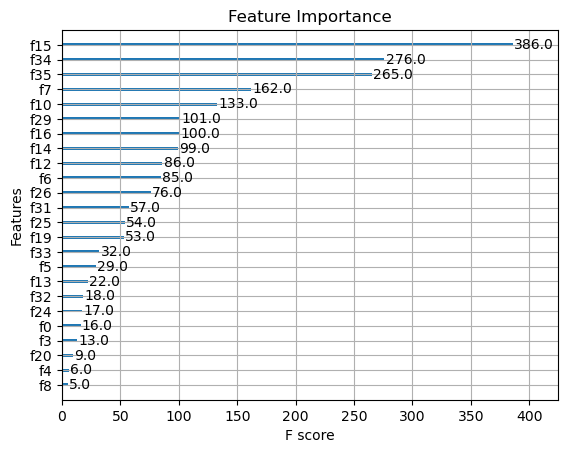

In [59]:
import matplotlib.pyplot as plt
import xgboost as xgb
import joblib

# 저장된 모델 불러오기
model = joblib.load('xgboost_model.pkl')

# 피처 중요도 추출
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

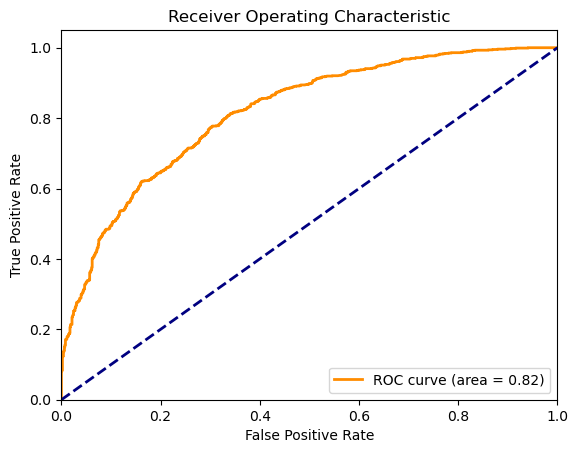

In [60]:
from sklearn.metrics import roc_curve, auc

# 예측 확률 얻기
y_pred_prob = model.predict_proba(X_test)[:, 1]

# ROC 곡선 계산
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# ROC 곡선 시각화
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

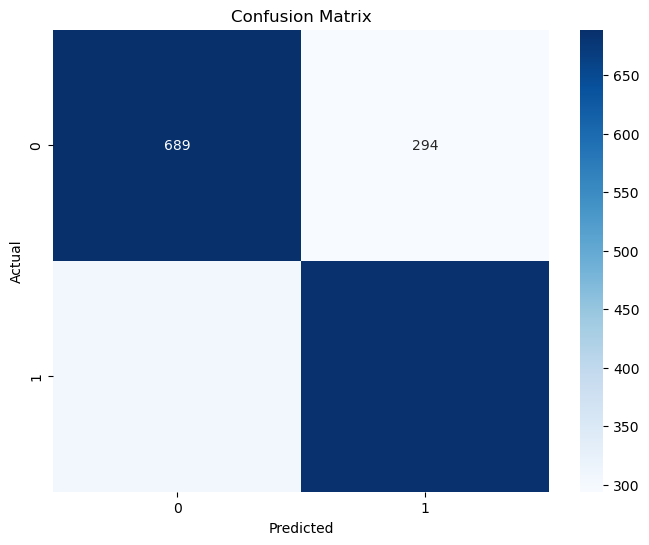

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()